In [ ]:
# importing modules and libraries

In [2]:
from dateutil.parser import parse

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import pandas as pd

In [3]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [4]:
# Import as Dataframe

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [6]:
df.head(20)

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
5,1991-12-01,4.306371
6,1992-01-01,5.088335
7,1992-02-01,2.814520
8,1992-03-01,2.985811
9,1992-04-01,3.204780


In [7]:
print (df.head())

        date     value
0 1991-07-01  3.526591
1 1991-08-01  3.180891
2 1991-09-01  3.252221
3 1991-10-01  3.611003
4 1991-11-01  3.565869


In [12]:
df.shape

(204, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [9]:
df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


In [ ]:
# 1. Visualizing a time series with dataset residing on external server

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [23]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [ ]:
# Draw Plot

In [14]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
  

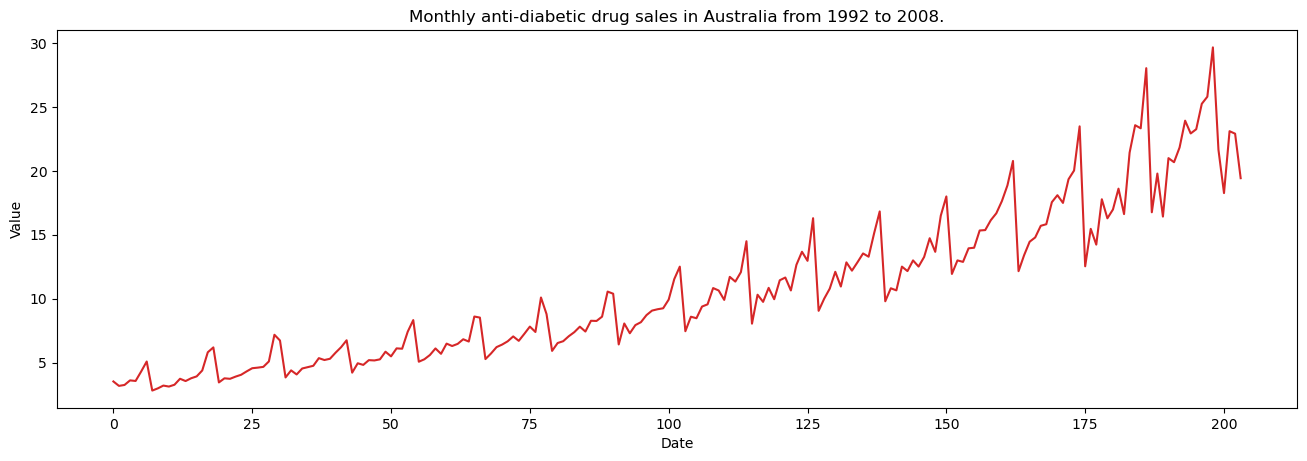

In [15]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

In [ ]:
# 2. Visualizing another time series with dataset residing on local disk

In [ ]:
# import data

In [16]:
df = pd.read_csv(r'C:\Users\Oluwaseun Alade\Documents\SOFTWARE\PYTHON\multiTimeline4.csv', parse_dates=['date'])

In [18]:
x = df['date'].values

In [19]:
y = df['value'].values

In [ ]:
# Draw Plot

In [20]:
def plot_df(df, x, y, title="", xlabel='date', ylabel='value', dpi=100):

    plt.figure(figsize=(16,5), dpi=dpi)

    plt.plot(x, y, color='tab:blue')

    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

    plt.show()

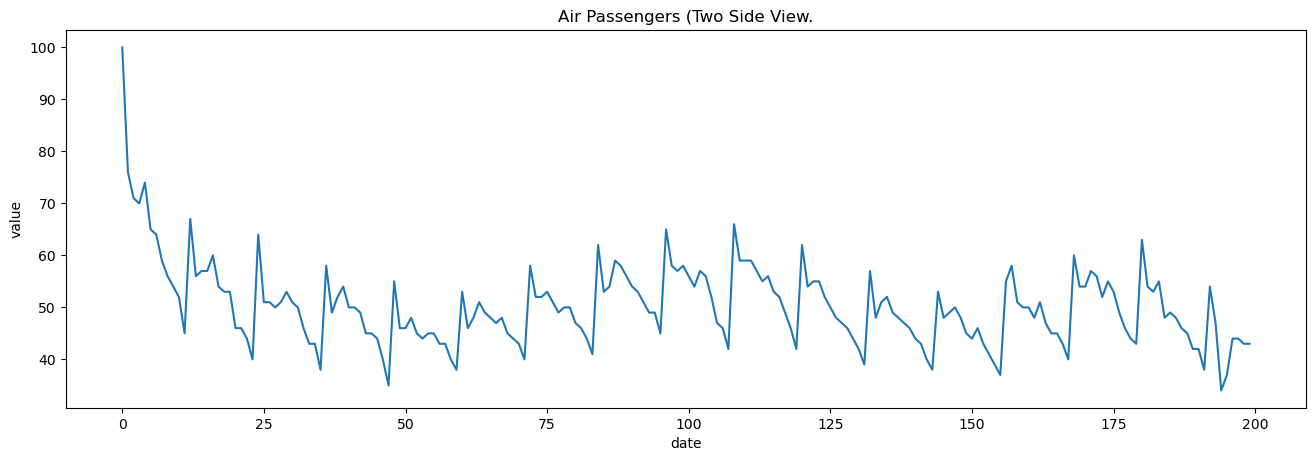

In [21]:
plot_df(df, x=df.index, y=df.value, title='Air Passengers (Two Side View.')

# Seasonal Plot of a Time Series

In [9]:
df = pd.read_csv(r'C:\Users\Oluwaseun Alade\Documents\SOFTWARE\PYTHON\a12.txt', parse_dates=['date'], index_col='date')
df.head(10)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


In [18]:
df.shape

(204, 4)

In [10]:
df.reset_index(inplace=True)

In [11]:
df['year'] = [d.year for d in df.date]

In [12]:
df['month'] = [d.strftime('%b') for d in df.date]

In [13]:
years = df['year'].unique()

In [14]:
np.random.seed(100)

In [15]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot

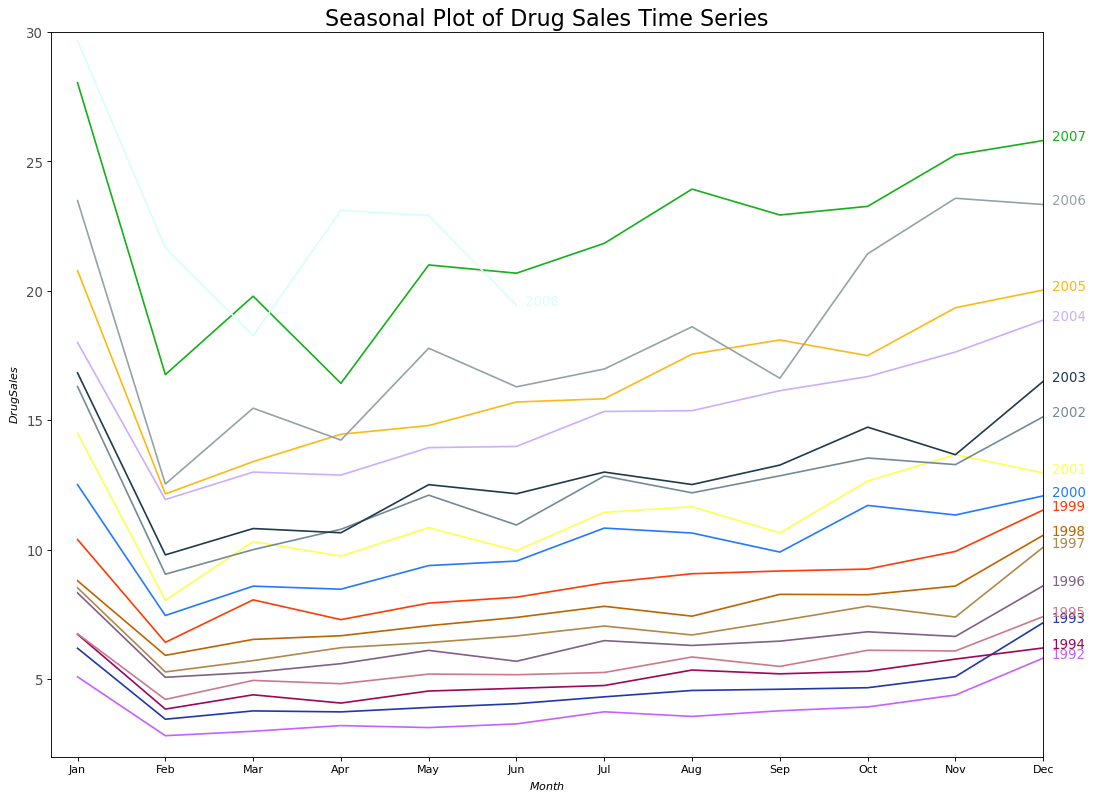

In [22]:
plt.figure(figsize=(16,12), dpi= 80)

for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])
      
    
    
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')

plt.yticks(fontsize=12, alpha=.7)

plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)

plt.show()